<a href="https://colab.research.google.com/github/andysontran/2-CHL5230-F23/blob/main/2_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Clone files on repository to Drive
!git clone https://github.com/andysontran/2-CHL5230-F23.git

# Set working directory
%cd 2-CHL5230-F23/

In [ ]:
# Read CSV file into Pandas df
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

**Dataframe characteristics:**

*   1465 rows, 12 columns
*   Columns: age (range: 14-73), gender (1-2), air pollution (1-8), alcohol usage (1-8), genetic risk (1-7), lung disease (1-7), obesity (1-7), smoking (1-8), passive smoker (1-8), chest pain (1-9), coughing of blood (1-9), severity (1-3)
*   Missing values = 0



In [ ]:
# Get shape of df
print(df.shape)

In [ ]:
# List columns of df
print(df.columns)

In [ ]:
# Display summary statistics
print(df.describe())

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

*Visualizing the Distribution*

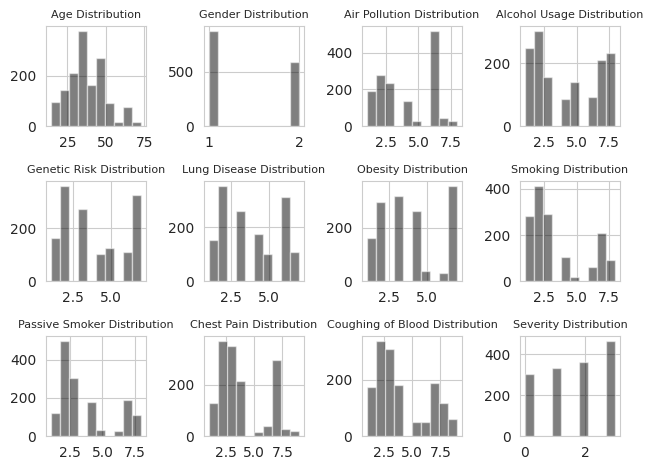

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a histogram
def draw_histograms(df, variables, n_rows, n_cols):
  fig = plt.figure()
  for i, var_name in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    df[var_name].hist(color = 'k', alpha = 0.5, bins = 10, ax = ax)
    ax.set_title(var_name + " Distribution")
    ax.title.set_size(8)
  fig.tight_layout()
  plt.show()

draw_histograms(df, df.columns, 3, 4)